In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install turicreate

In [ ]:
import turicreate

# Load the CIFAR-10 dataset

In [ ]:
image_train = turicreate.SFrame("/content/gdrive/My Drive/Machine Learning/Week 6/image_train_data")

In [ ]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Train nearest-neighbors model for retriving images using Deep Features

In [ ]:
knn_model = turicreate.nearest_neighbors.create(image_train, features=['deep_features'] , label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

#Use Image retrieval model with Deep Features to find similar images

,SArray
0,

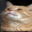

In [ ]:
cat = image_train[18:19]
cat['image'].explore()

In [ ]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 19.534ms     |

| Done         |         | 100         | 242.166ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [ ]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

In [ ]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.784ms      |

| Done         |         | 100         | 236.283ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

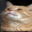
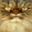
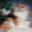
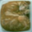
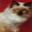

In [ ]:
cat_neighbors['image'].explore()

,SArray
0,

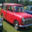

In [ ]:
car = image_train[8:9]
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 20.914ms     |

| Done         |         | 100         | 240.152ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

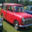
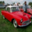
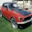
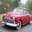
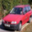

In [ ]:
get_images_from_ids(knn_model.query(car))['image'].explore()

In [ ]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 14.388ms     |

| Done         |         | 100         | 242.566ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

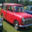
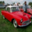
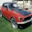
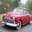
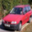

In [ ]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 18.469ms     |

| Done         |         | 100         | 247.048ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

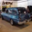
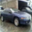
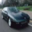
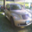
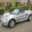

In [ ]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 19.354ms     |

| Done         |         | 100         | 235.368ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

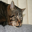
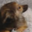
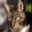
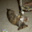
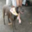

In [ ]:
show_neighbors(70)